# CGMF Summary File Analyzer

<font size=4em color="darkblue">Austin Carter<sup>a,b</sup>, Patrick Talou<sup>a</sup>, Ionel Stetcu<sup>a</sup></font> <br />
<sup>a</sup>Los Alamos National Laboratory <br />
<sup>b</sup>University of Michigan<br />

<a href="mailto:austinlc@umich.edu">austinlc@umich.edu</a>

In [8]:
import numpy as np
import scipy as sp
import os
from statistics import *
from datetime import datetime
import matplotlib.pyplot as plt
import sympy as sym
from sympy.interactive import printing
printing.init_printing(use_latex = 'mathjax')
from IPython.display import display, Math, Latex
%matplotlib inline

In [9]:
# Define summary file path and modify if necessary
summary_file_name = "Summary.txt"
summary_file_path = os.path.join(os.getcwd(),summary_file_name)

In [10]:
# get data from summary file

open_file = open(summary_file_path)
lines = open_file.readlines()
currentline = 6
filenames, nHist, TXE, TXEu, TKE, TKEu, J, Ju, nn, nnm2, nnm3, ng, ngm2, ngm3, En, Enu, Eg, Egu = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
while True:
    data = lines[currentline].split()
    filenames.append(data[0])
    nHist.append(data[1])
    TXE.append(data[2])
    TXEu.append(data[3])
    TKE.append(data[4])
    TKEu.append(data[5])
    J.append(data[6])
    Ju.append(data[7])
    nn.append(data[8])
    nnm2.append(data[9])
    nnm3.append(data[10])
    ng.append(data[11])
    ngm2.append(data[12])
    ngm3.append(data[13])
    En.append(data[14])
    Enu.append(data[15])
    Eg.append(data[16])
    Egu.append(data[17])
    currentline += 1
    if currentline == len(lines):
        break

In [11]:
def shorten(s, subs):
    i = s.index(subs)
    s = s[i+1:]
    i = s.index(subs)
    return s[:i]

def plot_and_report(x_vars, y_vars, x_labels, y_labels):
    
    #PLOT
    
    fig = plt.figure(figsize=(18,18))
    for i in range(len(y_vars)):  #rows
        for j in range(len(x_vars)):   #columns
            plt.subplot(len(y_vars),len(x_vars),len(x_vars)*i+j+1)
            plt.plot(x_vars[j],y_vars[i] , 'o')
            #bottom row, add xlabels
            if i == len(y_vars) - 1:
                plt.xlabel(x_labels[j])
            
            #left column, add ylabels
            if j == 0:
                plt.ylabel(y_labels[i])
                
    
                                                                                               
    # REPORT STATISTICS
    print("Pearson Correlation Coefficients:")
    for i in range(len(y_vars)):
        for j in range(len(x_vars)):
            #ONLY IN IPYTHON NOTEBOOK  
            reportstr = r"\begin{align}" + shorten(x_labels[j], "$") + '&&' + ' and ' + '&&' + shorten(y_labels[i], "$")+ ":"+ '&&'  + str(np.corrcoef(np.array(x_vars[j]).astype(float),np.array(y_vars[i]).astype(float))[0][1]) + '\end{align}'
            display(Math(reportstr))
                

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

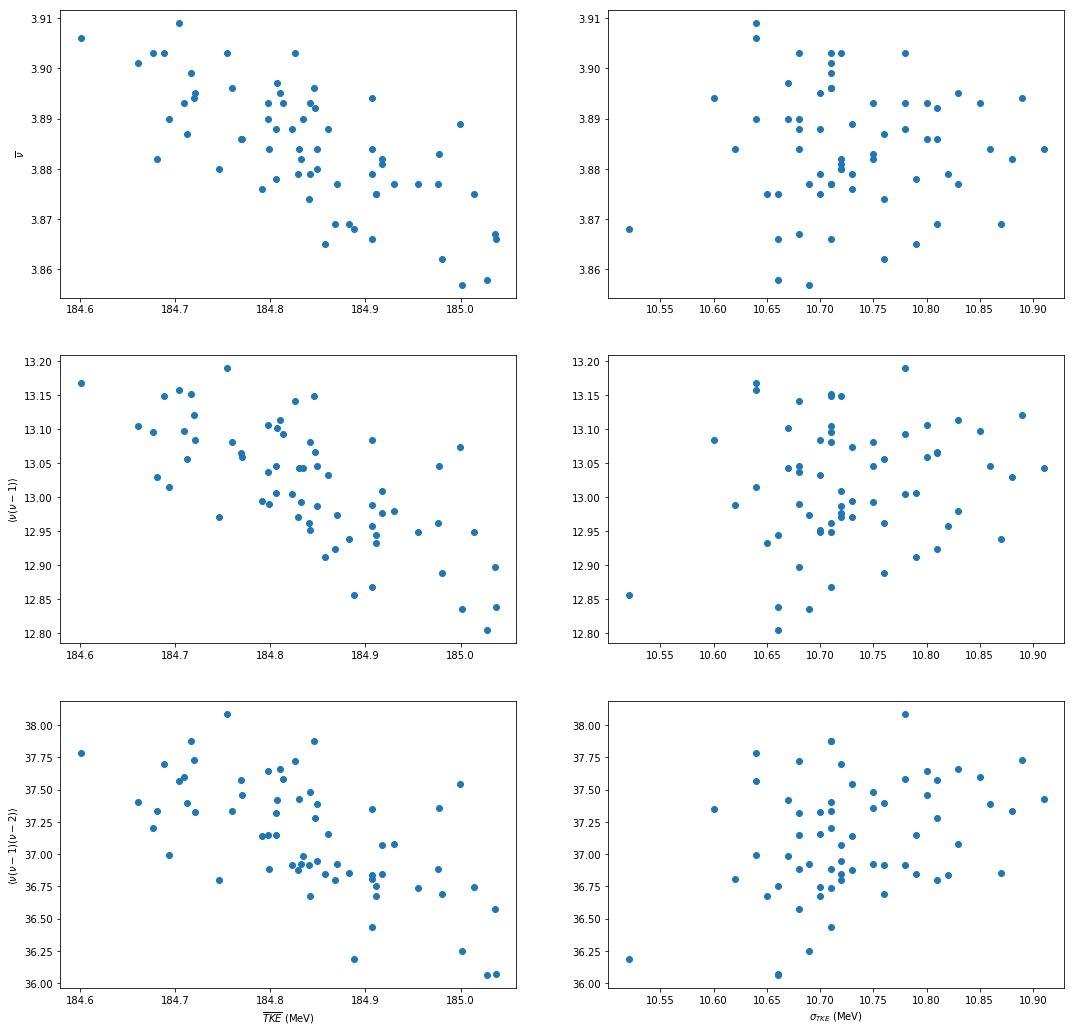

In [12]:
x = [TKE,TKEu]
y = [nn, nnm2, nnm3]
xlabels = [r"$\overline{TKE}$ (MeV)", r"$\sigma_{TKE}$ (MeV)"]
ylabels = [r'$\overline{\nu}$', r'$\left \langle \nu(\nu-1) \right \rangle$', r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

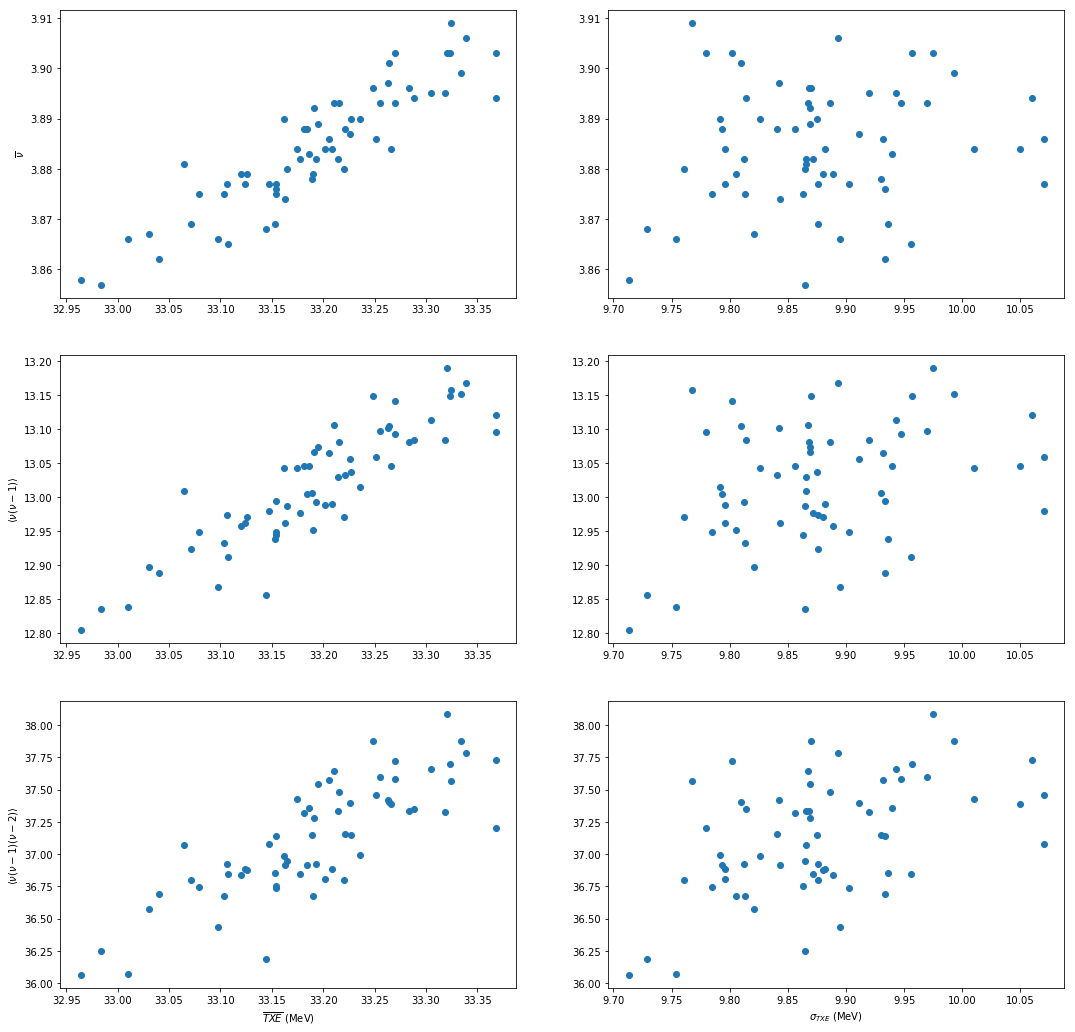

In [13]:
# Plot nn vs txe and moments

x = [TXE,TXEu]
y = [nn, nnm2, nnm3]
xlabels = [r"$\overline{TXE}$ (MeV)", r"$\sigma_{TXE}$ (MeV)"]
ylabels = [r'$\overline{\nu}$', r'$\left \langle \nu(\nu-1) \right \rangle$', r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

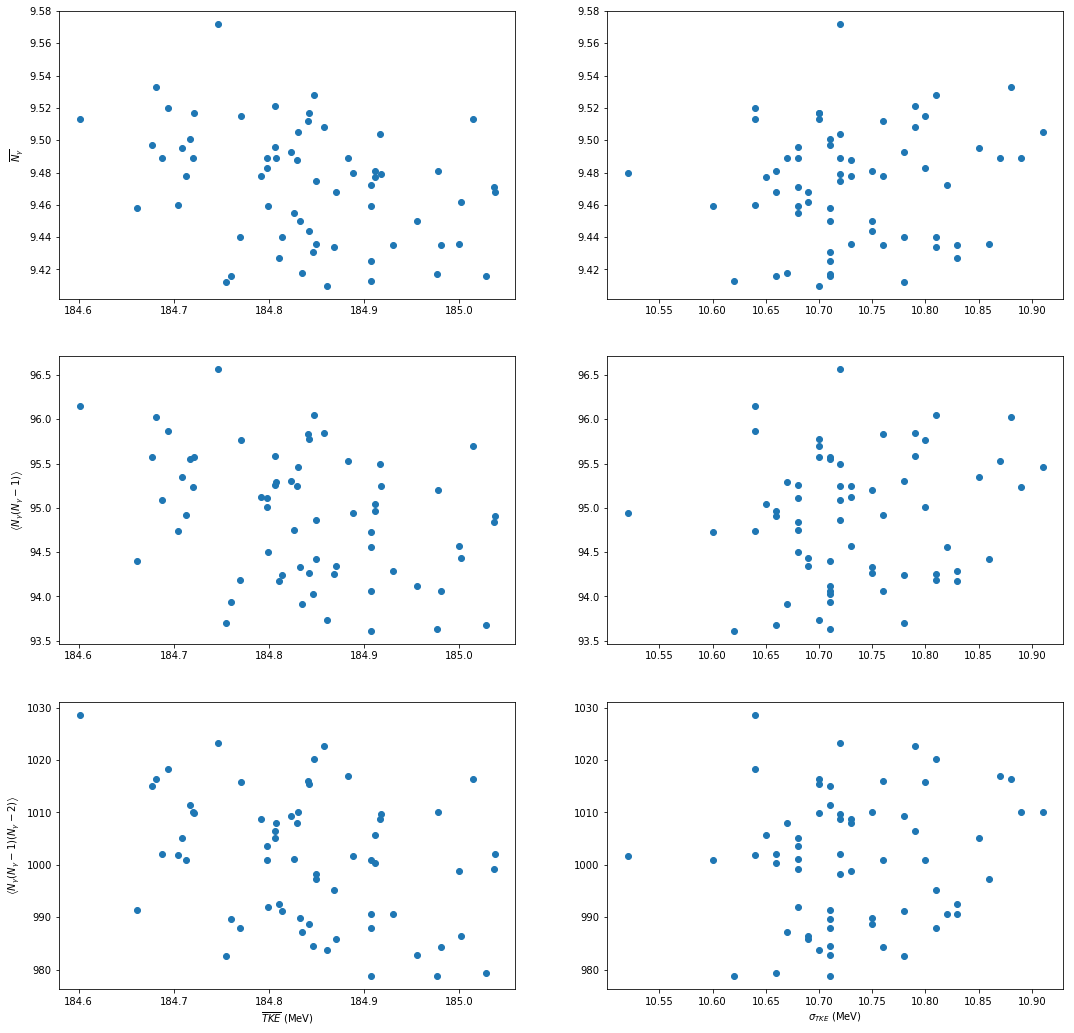

In [14]:
# Plot ng vs tke and moments

x = [TKE,TKEu]
y = [ng, ngm2, ngm3]
xlabels = [r"$\overline{TKE}$ (MeV)", r"$\sigma_{TKE}$ (MeV)"]
ylabels = [r'$\overline{N_{\gamma}}$', r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$', r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

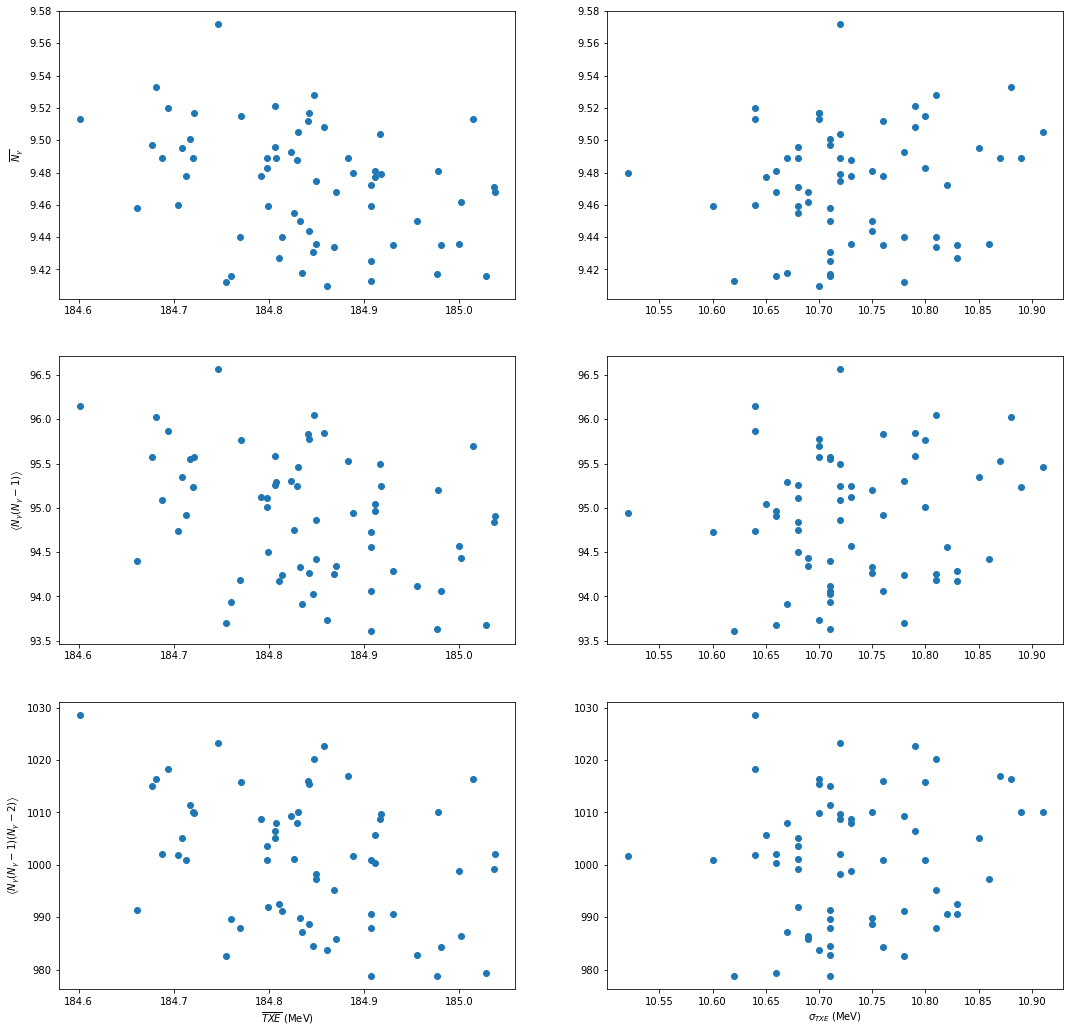

In [15]:
# Plot ng vs txe and moments

x = [TKE,TKEu]
y = [ng, ngm2, ngm3]
xlabels = [r"$\overline{TXE}$ (MeV)", r"$\sigma_{TXE}$ (MeV)"]
ylabels = [r'$\overline{N_{\gamma}}$', r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$', r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

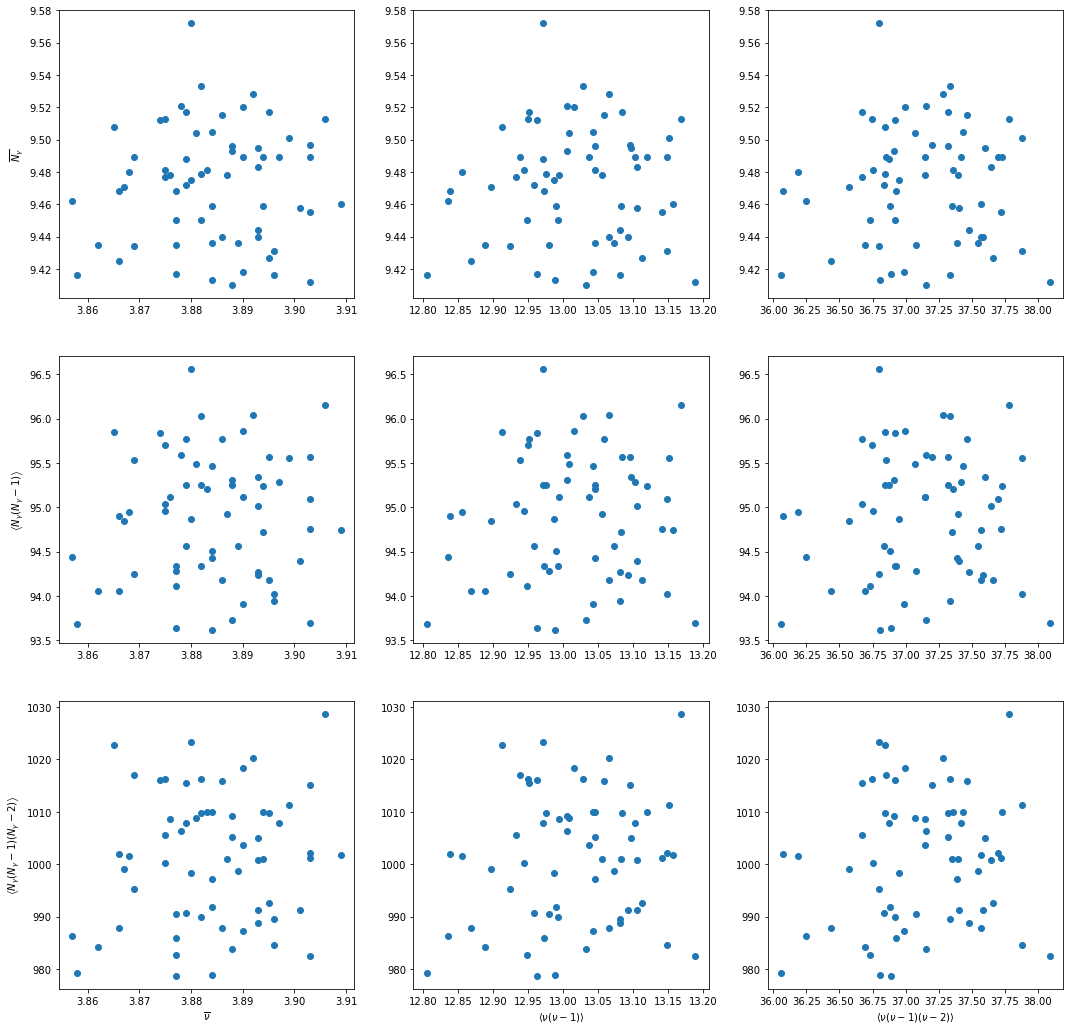

In [16]:
# Plot ng vs tke and moments

x = [nn,nnm2, nnm3]
y = [ng, ngm2, ngm3]
xlabels = [r'$\overline{\nu}$', r'$\left \langle \nu(\nu-1) \right \rangle$', r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$']
ylabels = [r'$\overline{N_{\gamma}}$', r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$', r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)